## FEATURE PROCESSING
In this section we will process the features of the dataset. This includes doing any feature engineering and
transformations being applied to the data. All of this is done after loading in the cleaned version of the data.


In [53]:
import pandas as pd
clean_path = 'credit_card_transactions_clean.csv'
df = pd.read_csv(clean_path)
# print("Loaded", df.shape, "rows × columns")
df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_outlier
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0


### SEPERATING DATE TIME 

For each transction-date-time we will seperate into hour, weekday, and category
This will help later in anomaly detection and clustering user behaviour based on time of day, day of week, and category.

In [54]:
df['trans_dt'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour']     = df['trans_dt'].dt.hour
df['weekday']  = df['trans_dt'].dt.weekday
df['month']    = df['trans_dt'].dt.month
df['year']    = df['trans_dt'].dt.year
df['day'] = df['trans_dt'].dt.day
df['dayofweek']      = df['trans_dt'].dt.dayofweek

In [55]:
df.drop(columns=['trans_date_trans_time'], inplace=True)
df.head(10)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_long,is_fraud,amt_outlier,trans_dt,hour,weekday,month,year,day,dayofweek
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,-82.048315,0,0,2019-01-01 00:00:18,0,1,1,2019,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,-118.186462,0,0,2019-01-01 00:00:44,0,1,1,2019,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,-112.154481,0,0,2019-01-01 00:00:51,0,1,1,2019,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.561071,0,0,2019-01-01 00:01:16,0,1,1,2019,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,-78.632459,0,0,2019-01-01 00:03:06,0,1,1,2019,1,1
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,...,-76.152667,0,0,2019-01-01 00:04:08,0,1,1,2019,1,1
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,...,-100.153370,0,0,2019-01-01 00:04:42,0,1,1,2019,1,1
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,...,-78.540296,0,0,2019-01-01 00:05:08,0,1,1,2019,1,1
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,...,-79.958146,0,0,2019-01-01 00:05:18,0,1,1,2019,1,1
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,...,-87.485381,0,0,2019-01-01 00:06:01,0,1,1,2019,1,1


## ADD CONSUMER AGE COLUMN
For each DOB, we will calculate the age based on the transaction date.

In [56]:
df['dob_year'] = pd.to_datetime(df['dob']).dt.year
df['age'] = df['year'] - df['dob_year']
df.head(10)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,amt_outlier,trans_dt,hour,weekday,month,year,day,dayofweek,dob_year,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0,2019-01-01 00:00:18,0,1,1,2019,1,1,1988,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,0,2019-01-01 00:00:44,0,1,1,2019,1,1,1978,41
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,0,2019-01-01 00:00:51,0,1,1,2019,1,1,1962,57
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,0,2019-01-01 00:01:16,0,1,1,2019,1,1,1967,52
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,0,2019-01-01 00:03:06,0,1,1,2019,1,1,1986,33
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,...,0,2019-01-01 00:04:08,0,1,1,2019,1,1,1961,58
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,...,0,2019-01-01 00:04:42,0,1,1,2019,1,1,1993,26
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,...,0,2019-01-01 00:05:08,0,1,1,2019,1,1,1947,72
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,...,0,2019-01-01 00:05:18,0,1,1,2019,1,1,1941,78
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,...,0,2019-01-01 00:06:01,0,1,1,2019,1,1,1974,45


1 Analyze Fraud Rate and Amount by Consumer Profiles (Gender, Age, Job, Spending Frequency, Location) 

1.1 Compute Fraud Rate and Amount by Consumer Gender

In [57]:
# 1.1 Compute Fraud Rate by Consumer Gender

# Compute fraud count and rate by gender 
fraud_ct_by_gender = df.groupby('gender')['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_gender.round(4))

# Compute fraud amount by gender
fraud_amt_by_gender = df.groupby(['gender', 'is_fraud'])['amt'].agg(['count','sum','mean'])
display(fraud_amt_by_gender.round(2))



,count,sum,mean
gender,,,
F,709863,3735,0.0053
M,586812,3771,0.0064


count          sum    mean
gender is_fraud                             
F      0         706128  47987325.49   67.96
       1           3735   1845287.34  494.05
M      0         583041  39247014.80   67.31
       1           3771   2142801.27  568.23

1.2 Compute Fraud Rate and Amount by Consumer Age

In [58]:
# Identify min and max age in the dataset
print('min:', min(df['age']), 'max: ', max(df['age']))

# Compute fraud count and rate by gender 
fraud_ct_by_gender = df.groupby('age')['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_gender.round(4))

# Compute fraud amount by gender
fraud_amt_by_gender = df.groupby(['is_fraud','age'])['amt'].agg(['count','sum','mean'])
display(fraud_amt_by_gender.round(2))

min: 14 max:  96


,count,sum,mean
age,,,
14,1318,7,0.0053
15,5817,16,0.0028
16,5104,37,0.0072
17,1191,0,0.0000
18,3901,58,0.0149
...,...,...,...
92,4450,70,0.0157
93,5684,16,0.0028
94,1722,27,0.0157


count        sum    mean
is_fraud age                          
0        14    1311   92161.58   70.30
         15    5801  345219.29   59.51
         16    5067  314633.70   62.09
         17    1191   77805.07   65.33
         18    3843  229466.15   59.71
...             ...        ...     ...
1        90      40   24543.43  613.59
         91      23   11133.37  484.06
         92      70   38435.97  549.09
         93      16    8513.20  532.08
         94      27   15520.87  574.85

[163 rows x 3 columns]

1.3 Compute Fraud Rate and Amount by Consumer category 

In [59]:
# Compute fraud count and rate by category
fraud_ct_by_job = df.groupby('job')['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_job.round(4).sort_values(by='sum', ascending=False).head(10))

# Compute fraud amount by Job 
fraud_amt_by_job = df.groupby(['is_fraud','job'])['amt'].agg(['count','sum','mean'])
display(fraud_amt_by_job.round(2).sort_values(by='sum', ascending=False))

,count,sum,mean
job,,,
Materials engineer,8270,62,0.0075
Trading standards officer,4641,56,0.0121
Naval architect,8684,53,0.0061
Exhibition designer,9199,51,0.0055
"Surveyor, land/geomatics",8680,50,0.0058
Mechanical engineer,5632,49,0.0087
Prison officer,5701,48,0.0084
Quantity surveyor,5646,48,0.0085
Audiological scientist,6118,46,0.0075


count        sum    mean
is_fraud job                                                           
0        Film/video editor                      9735  729757.25   74.96
         Exhibition designer                    9148  625789.30   68.41
         Naval architect                        8631  602173.44   69.77
         Surveyor, land/geomatics               8630  590188.77   68.39
         Environmental consultant               7525  568629.72   75.57
...                                              ...        ...     ...
1        Geophysicist/field seismologist           5     803.28  160.66
         Theatre manager                           5     629.30  125.86
         Statistician                              3     512.13  170.71
         Contractor                                2     344.74  172.37
         English as a second language teacher      2     280.15  140.08

[918 rows x 3 columns]

1.4 Compute Fraud Rate and Amount by Spending Frequency

In [60]:
# Compute fraud rate and count and spending frequency
fraud_ct_by_spending = df.groupby('cc_num')['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_spending.round(4).sort_values(by='sum', ascending=False).head(10))

# Compute fraud amount by spending frequency 
fraud_amt_by_spending = df.groupby(['is_fraud','cc_num'])['amt'].agg(['count','sum','mean'])
display(fraud_amt_by_spending.round(2).sort_values(by='sum', ascending=False))

,count,sum,mean
cc_num,,,
3520550088202337,989,19,0.0192
4593569795412,19,19,1.0000
4260128500325,1466,18,0.0123
4874006077381178,516,16,0.0310
3556613125071656,2556,16,0.0063
3576021480694169,2527,16,0.0063
3575540972310993,1542,16,0.0104
4400011257587661852,2030,16,0.0079
30074693890476,2057,16,0.0078


count        sum    mean
is_fraud cc_num                                       
0        6011367958204270      3110  296436.73   95.32
         4908846471916297      3036  289354.03   95.31
         6011893664860915      3090  278325.97   90.07
         6011438889172900      3092  278239.89   89.99
         3583635130604947      3026  278042.99   91.88
...                             ...        ...     ...
1        4503101193493052864      2     341.06  170.53
         6011109736646996         2     280.15  140.08
         4069975342931683         3      55.21   18.40
         4809701904914            2      25.40   12.70
         4005676619255478         2      20.44   10.22

[1670 rows x 3 columns]

1.5 Compute Fraud Rate and Amount by Consumer Location


In [61]:
# Compute fraud rate and count and consumer location

#by state
fraud_ct_by_state = df.groupby(['state'])['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_state.round(4).sort_values(by='sum', ascending=False).head(10))

#by city
fraud_ct_by_city = df.groupby(['state','city'])['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_city.round(4).sort_values(by='sum', ascending=False).head(10))

#by city by amount 
fraud_ct_by_city_a = df.groupby(['is_fraud','city'])['amt'].agg(['count','sum','mean'])
display(fraud_ct_by_city_a.round(4).sort_values(by='sum', ascending=False))

#compare with city population
fraud_amt_by_citypop = df.groupby(['state','city','city_pop'])['is_fraud'].agg(['count','sum','mean'])
display(fraud_amt_by_citypop.round(2).sort_values(by='sum', ascending=False))

,count,sum,mean
state,,,
NY,83501,555,0.0066
TX,94876,479,0.0050
PA,79847,458,0.0057
CA,56360,326,0.0058
OH,46480,321,0.0069
FL,42671,281,0.0066
IL,43252,248,0.0057
MI,46154,238,0.0052
AL,40989,215,0.0052


,,count,sum,mean
state,city,,,
TX,Houston,4168,39,0.0094
FL,Naples,4155,29,0.0070
AL,Huntsville,3560,29,0.0081
TX,Dallas,3629,27,0.0074
OK,Tulsa,3086,27,0.0087
KS,Topeka,3028,27,0.0089
MI,Detroit,3584,26,0.0073
TX,San Antonio,5130,25,0.0049
PA,Beaver Falls,1579,24,0.0152


count        sum      mean
is_fraud city                                      
0        Meridian         5047  436389.11   86.4651
         Brandon          4023  363469.09   90.3478
         Phoenix          5073  358382.64   70.6451
         Houston          4129  353598.28   85.6378
         Utica            5080  339928.46   66.9151
...                        ...        ...       ...
1        Bethel              3     369.26  123.0867
         Phoenix             2     344.74  172.3700
         Hurricane           3      55.21   18.4033
         Phenix City         2      25.40   12.7000
         Denham Springs      2      20.44   10.2200

[1538 rows x 3 columns]

count  sum  mean
state city         city_pop                  
TX    Houston      2906700    4168   39  0.01
FL    Naples       276002     4155   29  0.01
AL    Huntsville   190178     3560   29  0.01
TX    Dallas       1263321    3629   27  0.01
OK    Tulsa        413574     3086   27  0.01
...                            ...  ...   ...
MS    Jackson      233060      496    0  0.00
      Mayersville  595        2035    0  0.00
      Meadville    2799        506    0  0.00
      Moorhead     2870       3113    0  0.00
PA    Keisterville 184        2062    0  0.00

[928 rows x 3 columns]

# EDA/FEATURE ENGINEERING FOR GUIDING QUESTION 2: 

## What patterns in transaction behaviours such as spending frequency, merchant types, or time-of-day patterns are associated with different customer profiles or potential fraudulent activities?

2 Analyze Fraud Rate and Amount by Merchant Profiles (Merchant, Merchant Type and Merchant Location)

2.1 Compute Fraud Rate and Amount By Merchant Name

In [ ]:
# Compute fraud rate and count by merchant name
fraud_ct_by_merchant = df.groupby(['merchant'])['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_merchant.round(4).sort_values(by='sum', ascending=False).head(10))

# Compute fraud amount by merchant name
fraud_amt_by_merchant = df[df['is_fraud'] == 1].groupby(['merchant'])['amt'].agg(['count','sum','mean'])
display(fraud_amt_by_merchant.round(2).sort_values(by='sum', ascending=False).head(10))

,count,sum,mean
merchant,,,
fraud_Rau and Sons,2490,49,0.0197
fraud_Kozey-Boehm,1866,48,0.0257
fraud_Cormier LLC,3649,48,0.0132
fraud_Vandervort-Funk,2474,47,0.0190
fraud_Doyle Ltd,2558,47,0.0184
fraud_Kilback LLC,4403,47,0.0107
fraud_Kuhn LLC,3510,44,0.0125
fraud_Padberg-Welch,2424,44,0.0182
fraud_Terry-Huel,1996,43,0.0215


,count,sum,mean
merchant,,,
fraud_Kozey-Boehm,48,48189.98,1003.96
fraud_Cormier LLC,48,44903.89,935.50
fraud_Jast Ltd,42,42560.34,1013.34
fraud_Terry-Huel,43,42356.37,985.03
fraud_Goyette Inc,42,41580.84,990.02
fraud_Kerluke-Abshire,41,40909.57,997.79
"fraud_Schmeler, Bashirian and Price",41,40143.05,979.10
fraud_Gleason-Macejkovic,40,39892.84,997.32
"fraud_Kuhic, Bins and Pfeffer",39,39865.69,1022.20


2.1 Compute Fraud Rate and Amount by Merchant Type

,count,sum,mean
category,,,
shopping_net,97543,1713,0.0176
misc_net,63287,915,0.0145
grocery_pos,123638,1743,0.0141
shopping_pos,116672,843,0.0072
gas_transport,131659,618,0.0047
misc_pos,79655,250,0.0031
grocery_net,45452,134,0.0029
travel,40507,116,0.0029
entertainment,94014,233,0.0025


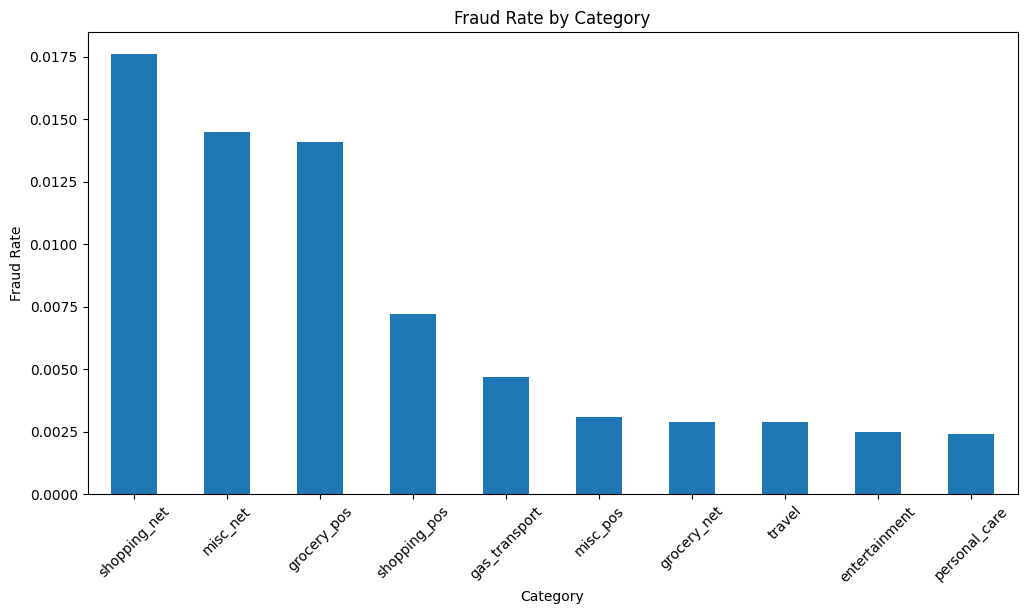

In [ ]:
# Compute fraud count and rate by category
fraud_ct_by_category = df.groupby('category')['is_fraud'].agg(['count','sum','mean'])
fraud_ct_by_category = fraud_ct_by_category.round(4).sort_values(by='mean', ascending=False).head(10)
display(fraud_ct_by_category)

#plot fraud rate by category
import matplotlib.pyplot as plt
fraud_ct_by_category['mean'].plot(kind='bar', figsize=(12, 6), title='Fraud Rate by Category')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()



,count,sum,mean
category,,,
shopping_net,1713,1711723.71,999.254939
shopping_pos,843,739245.09,876.921815
misc_net,915,729266.76,797.012852
grocery_pos,1743,543797.90,311.989616
entertainment,233,117323.79,503.535579
misc_pos,250,54571.02,218.284080
home,198,50971.66,257.432626
food_dining,151,18131.62,120.076954
gas_transport,618,7594.11,12.288204


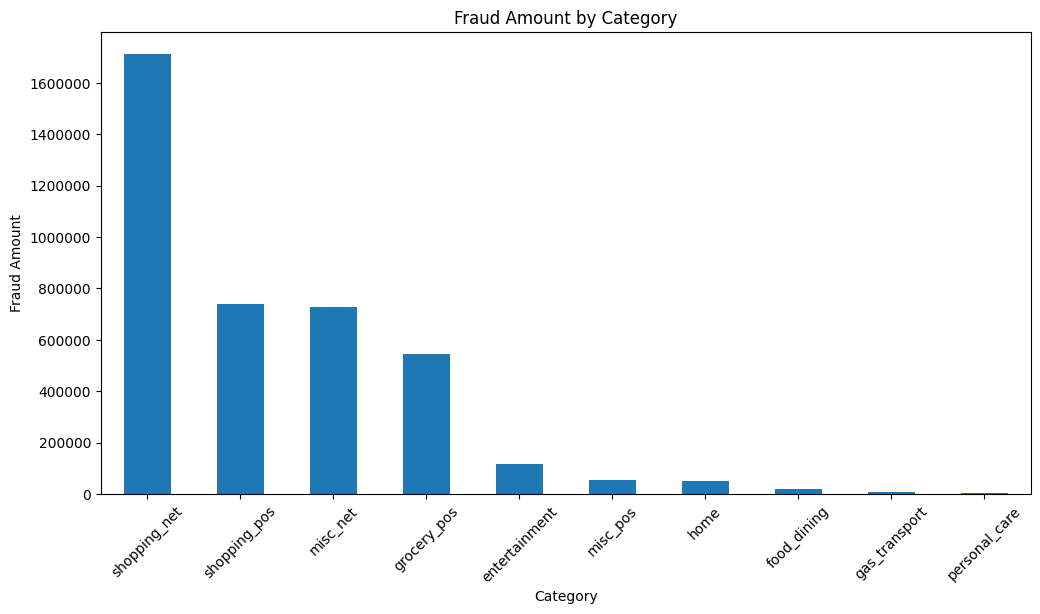

In [103]:
# Compute fraud amount by category 
fraud_amt_by_category = df[df['is_fraud'] == 1].groupby(['category'])['amt'].agg(['count','sum','mean'])

#format the fraud amount with conma and two decimal places                   
fraud_amt_by_category = fraud_amt_by_category.sort_values(by='sum', ascending=False).head(10)
display(fraud_amt_by_category)

# Plot fraud amount by category
fraud_amt_by_category['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Amount by Category')
plt.xlabel('Category')
plt.ylabel('Fraud Amount')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
plt.show()


2.2 Compute Fraud Rate and Amount by Merchant Location

In [ ]:
# Compute fraud count and rate by Merchant Location
fraud_ct_by_merchant = df.groupby('merchant')['is_fraud'].agg(['count','sum','mean'])
display(fraud_ct_by_merchant.round(4).sort_values(by='sum', ascending=False).head(10))  




,count,sum,mean
merchant,,,
fraud_Rau and Sons,2490,49,0.0197
fraud_Kozey-Boehm,1866,48,0.0257
fraud_Cormier LLC,3649,48,0.0132
fraud_Vandervort-Funk,2474,47,0.0190
fraud_Doyle Ltd,2558,47,0.0184
fraud_Kilback LLC,4403,47,0.0107
fraud_Kuhn LLC,3510,44,0.0125
fraud_Padberg-Welch,2424,44,0.0182
fraud_Terry-Huel,1996,43,0.0215


ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'amt_outlier', 'trans_dt', 'hour', 'weekday', 'month', 'year', 'day', 'dayofweek', 'dob_year', 'age'] but received: fips

In [124]:

# Compute fraud amount by Merchant Location
fraud_amt_by_merchant = df[df['is_fraud'] == 1].groupby(['merchant'])['amt'].agg(['count','sum','mean'])
display(fraud_amt_by_merchant.round(2).sort_values(by='sum', ascending=False).head(10))  

,count,sum,mean
merchant,,,
fraud_Kozey-Boehm,48,48189.98,1003.96
fraud_Cormier LLC,48,44903.89,935.50
fraud_Jast Ltd,42,42560.34,1013.34
fraud_Terry-Huel,43,42356.37,985.03
fraud_Goyette Inc,42,41580.84,990.02
fraud_Kerluke-Abshire,41,40909.57,997.79
"fraud_Schmeler, Bashirian and Price",41,40143.05,979.10
fraud_Gleason-Macejkovic,40,39892.84,997.32
"fraud_Kuhic, Bins and Pfeffer",39,39865.69,1022.20


3 Analyze Fraud Rate and Amount by Season, Day of Week, Time of Day Patterns

3.1 Compute Fraud Rate and Amount by month

,count,sum,mean
month,,,
3,143789,938,0.006523
5,146875,935,0.006366
2,97657,853,0.008735
1,104727,849,0.008107
6,143811,688,0.004784
4,134970,678,0.005023
12,141060,592,0.004197
10,68758,454,0.006603
9,70652,418,0.005916


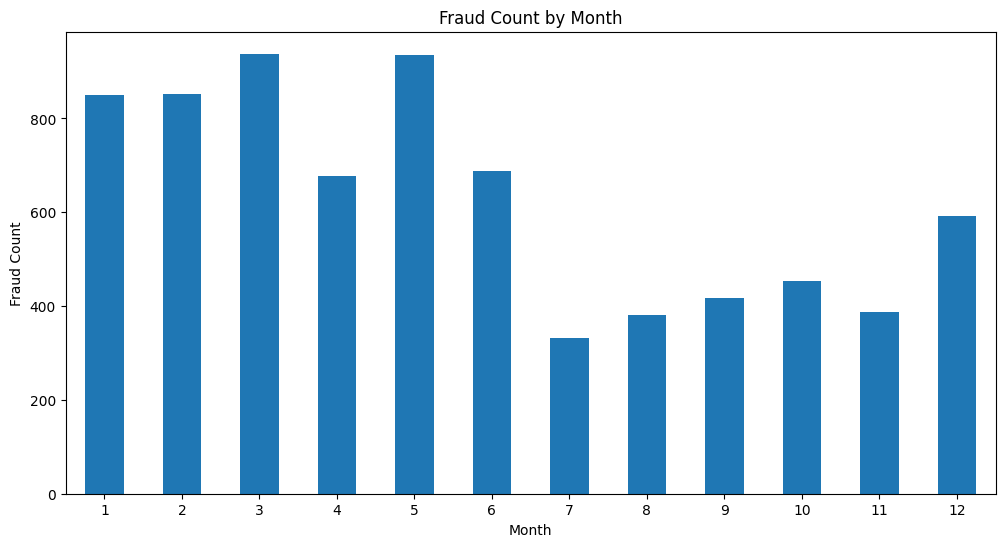

,count,sum,mean
month,,,
5,935,497775.49,532.380203
3,938,471727.69,502.907985
2,853,458001.19,536.929883
1,849,444375.74,523.410766
6,688,358434.41,520.980247
4,678,354241.27,522.479749
12,592,335157.54,566.144493
10,454,257739.72,567.708634
9,418,217675.37,520.754474


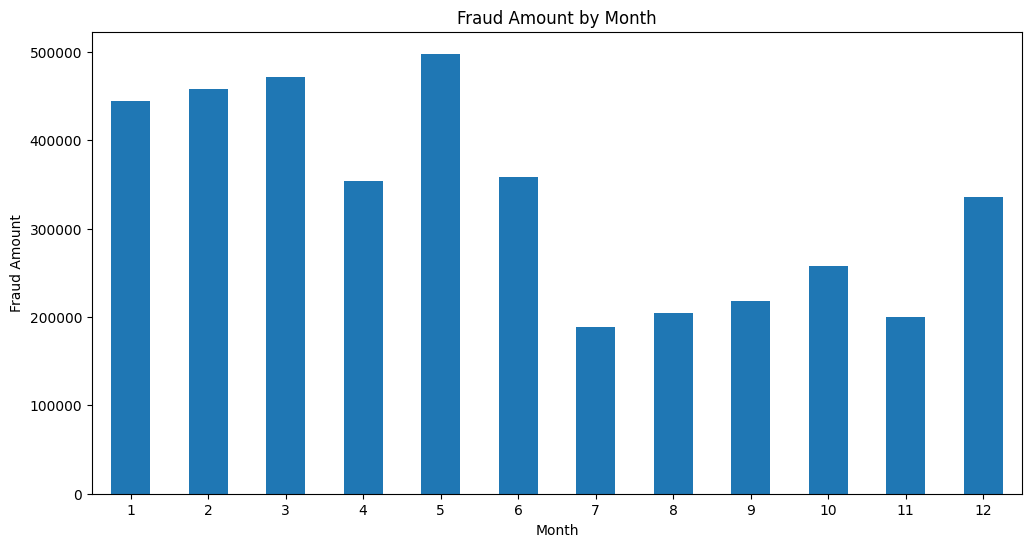

In [ ]:
# Compute fraud count and rate by category
fraud_ct_by_month = df.groupby('month')['is_fraud'].agg(['count','sum','mean'])
fraud_ct_by_month_sorted = fraud_ct_by_month.sort_values(by='sum', ascending=False).head(10) 
display(fraud_ct_by_month_sorted)

# Plot fraud count by month by category
fraud_ct_by_month['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Count by Month')
plt.xlabel('Month') 
plt.ylabel('Fraud Count')
plt.xticks(rotation=0)
plt.show()



,count,sum,mean
month,,,
5,935,497775.49,532.380203
3,938,471727.69,502.907985
2,853,458001.19,536.929883
1,849,444375.74,523.410766
6,688,358434.41,520.980247
4,678,354241.27,522.479749
12,592,335157.54,566.144493
10,454,257739.72,567.708634
9,418,217675.37,520.754474


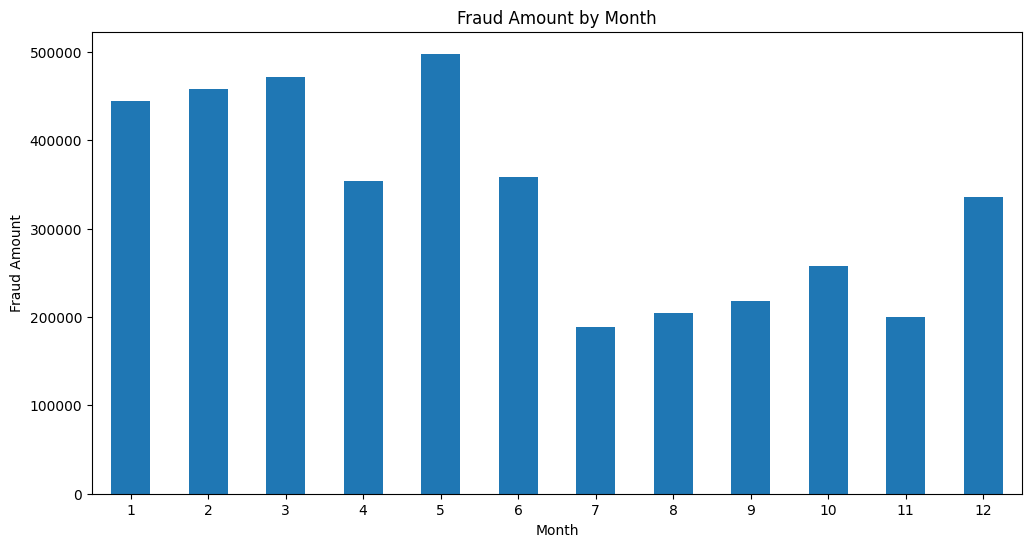

In [125]:



# Compute fraud amount by month 
fraud_amt_by_month = df[df['is_fraud'] == 1].groupby(['month'])['amt'].agg(['count','sum','mean'])
fraud_amt_by_month_sorted = fraud_amt_by_month.sort_values(by='sum', ascending=False).head(10) 
display(fraud_amt_by_month_sorted)

# Plot fraud amount by month
fraud_amt_by_month['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Amount by Month')
plt.xlabel('Month')
plt.ylabel('Fraud Amount')
plt.xticks(rotation=0)
plt.show()

#Based on 3.1 fraud volume and amount by month, the first half of the year between January and June have higher fraud volume than those in later half of the year between July and December. 
# there was a highest fraud volume in May, while July had the least. 

3.2 Compute Fraud Rate and Amount by Day of Week

,count,sum,mean
dayofweek,,,
5,200957,1227,0.006106
6,250579,1216,0.004853
0,254282,1182,0.004648
4,152272,1079,0.007086
3,147285,1008,0.006844
1,160227,935,0.005835
2,131073,859,0.006554


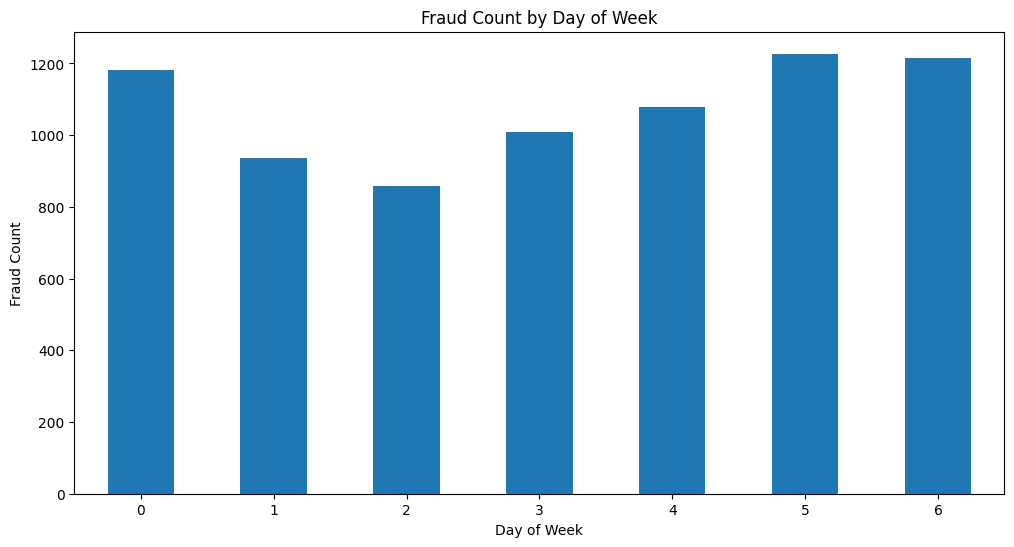

In [133]:
# Compute fraud count and rate by dayofweek
fraud_ct_by_dayofweek = df.groupby('dayofweek')['is_fraud'].agg(['count','sum','mean'])
fraud_ct_by_dayofweek_sorted = fraud_ct_by_dayofweek.sort_values(by='sum', ascending=False).head(10)
display(fraud_ct_by_dayofweek_sorted)
# Plot fraud count by dayofweek
fraud_ct_by_dayofweek['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Count')
plt.xticks(rotation=0)
plt.show()



,count,sum,mean
dayofweek,,,
6,1216,663864.01,545.940798
5,1227,636539.35,518.776976
0,1182,610146.66,516.198528
4,1079,581816.53,539.218285
3,1008,544490.00,540.168651
1,935,501650.80,536.524920
2,859,449581.26,523.377485


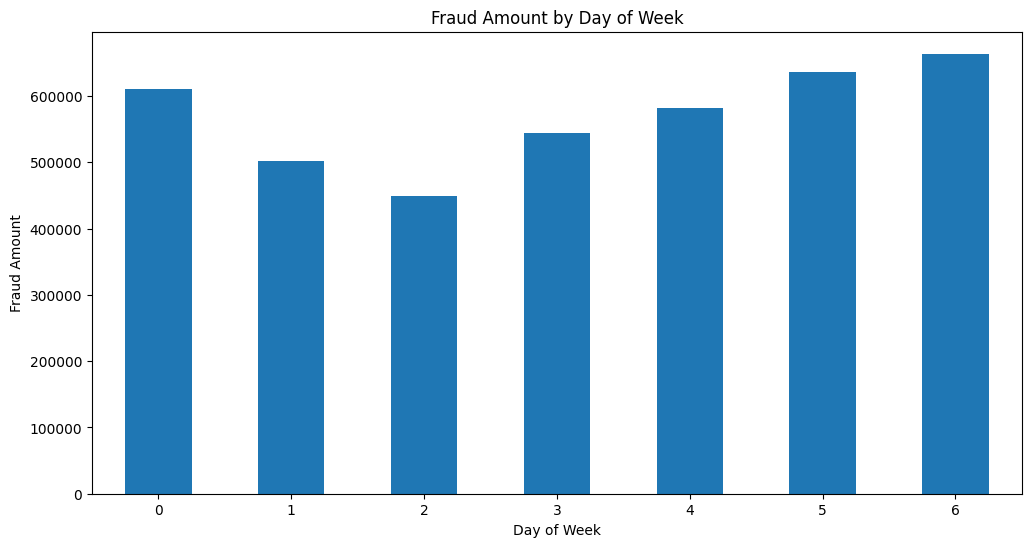

In [127]:

# Compute fraud amount by dayofweek 
fraud_amt_by_dayofweek = df[df['is_fraud'] == 1].groupby(['dayofweek'])['amt'].agg(['count','sum','mean'])
fraud_amt_by_dayofweek_sorted = fraud_amt_by_dayofweek.sort_values(by='sum', ascending=False).head(10)
display(fraud_amt_by_dayofweek_sorted)

# Plot fraud amount by dayofweek
fraud_amt_by_dayofweek['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Amount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Amount')
plt.xticks(rotation=0)
plt.show()

# Based on 3.2 Fraud Rate and Amount by Day of Week, fraud volume and amount are the lowest on mid-week on Wednesday, then gradually increase with a peak on Sunday. 
# Weekend 

3.3 Compute Fraud Rate and Amount by Time of Day

,count,sum,mean
hour,,,
22,66982,1931,0.028829
23,67104,1904,0.028374
1,42869,658,0.015349
0,42502,635,0.014940
2,42656,625,0.014652
3,42769,609,0.014239
14,64885,86,0.001325
19,65508,81,0.001236
18,66051,81,0.001226


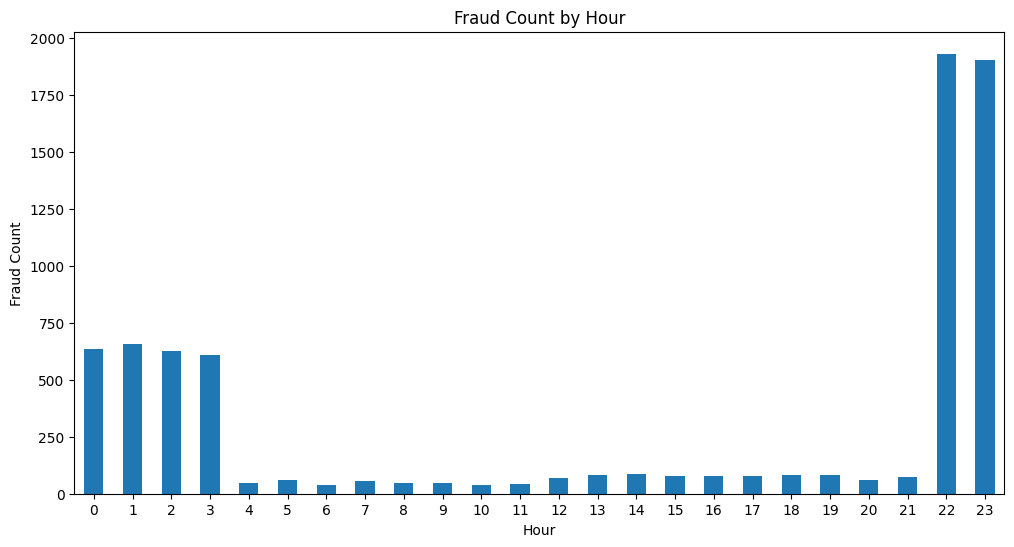

In [130]:
# Compute fraud count and rate by hour
fraud_ct_by_hour = df.groupby('hour')['is_fraud'].agg(['count','sum','mean'])
fraud_ct_by_hour_sorted = fraud_ct_by_hour.sort_values(by='sum', ascending=False).head(10)
display(fraud_ct_by_hour_sorted)

# Plot fraud count by hour
import matplotlib.pyplot as plt
fraud_ct_by_hour['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Count by Hour')
plt.xlabel('Hour') 
plt.ylabel('Fraud Count')
plt.xticks(rotation=0)
plt.show()



,count,sum,mean
hour,,,
22,1931,1274662.84,660.105044
23,1904,1209673.61,635.332778
1,658,230736.79,350.663815
2,625,222377.08,355.803328
0,635,218345.21,343.850724
3,609,211153.52,346.721708
14,86,61338.04,713.233023
19,81,52445.53,647.475679
18,81,50594.97,624.629259


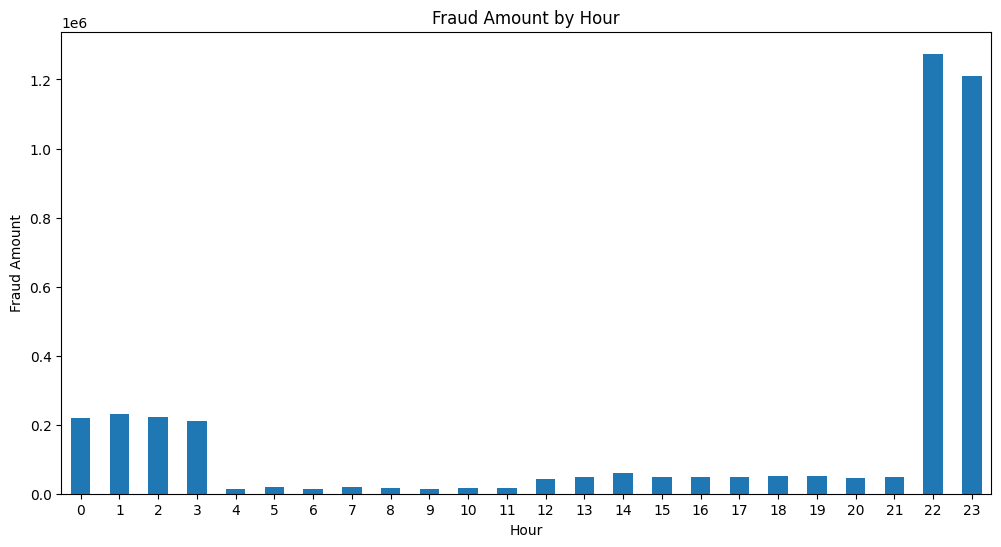

In [131]:
# Compute fraud amount by hour 
fraud_amt_by_hour = df[df['is_fraud'] == 1].groupby(['hour'])['amt'].agg(['count','sum','mean'])
fraud_amt_by_hour_sorted = fraud_amt_by_hour.sort_values(by='sum', ascending=False).head(10)
display(fraud_amt_by_hour_sorted)

# Plot fraud amount by hour
fraud_amt_by_hour['sum'].plot(kind='bar', figsize=(12, 6), title='Fraud Amount by Hour')
plt.xlabel('Hour')
plt.ylabel('Fraud Amount')
plt.xticks(rotation=0)
plt.show()

## Based on 3.3 Fraud Rate and Amount by Time of Day, the fraud is more likely to occur at late night between 22:00 and 3:00, with higher focus between 22:00 and 23:00. 
# Fraud count and amount are the lowest in the morning between 4:00 am and 11:00 am. 
